<a href="https://colab.research.google.com/github/mzyatkov/optimization_project/blob/master/code/Project_optim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Methods' implementation depending on the Nsteps

In [1]:
import math
import numpy as np

In [2]:
def taylor_drori(grad, x_0, mu, L, N):
  z = np.empty((N+1, x_0.shape[0]))
  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N+1, x_0.shape[0]))
  A = np.empty((N+1, 1))
  delta = np.empty((N, 1))
  b = np.empty((N, 1))
  z[0] = x_0
  x[0]=x_0
  y[0] = x_0
  A[0] = 0
  q = mu/L
  if q ==1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
  for k in range(N):
    A[k+1]=(((1+q)*A[k]+2*(1+np.sqrt((1+A[k])*(1+q*A[k]))))/(1-q)**2)
    b[k]=(A[k]/((1-q)*A[k+1]))
    delta[k]=(1/2.*(((1-q)**2)*A[k+1]-(1+q)*A[k])/(1+q+q*A[k]))
    y[k]=((1-b[k])*z[k]+b[k]*x[k])
    x[k+1]=(y[k]-1/L*grad(y[k]))
    z[k+1]=((1-q*delta[k])*z[k]+q*delta[k]*y[k]- delta[k]/L*grad(y[k]))
  njev = N
  return y,x,z, njev
# y for optimizing function values, while z for disctance to the optimal solution


In [3]:
def gradient_descent(dP, w0, step, Nsteps):
    w = np.zeros((Nsteps+1, w0.size))
    w[0]=w0
    for i in range(Nsteps):
      w[i+1] = (w[i]-step*dP(w[i]))
    return w

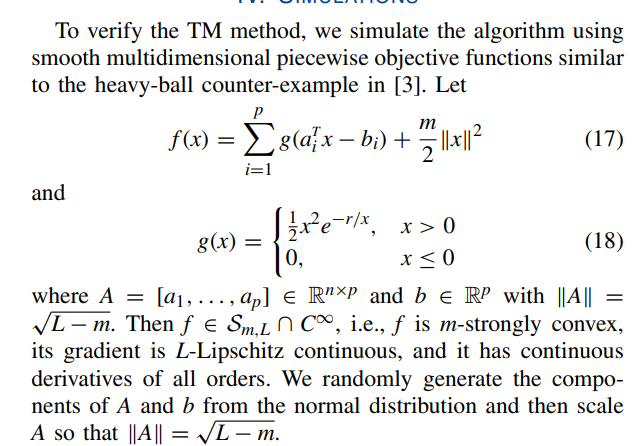

In [4]:
def TMM(grad, x_0, mu, L, N):
  q = mu/L
  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
  if q==0 :
    print(f"TTM is undefined, mu == 0")
    return None, None, None
  ro = 1-np.sqrt(q)
  alpha = (1+ro)/L
  beta = ro**2/(2-ro)
  gamma = ro**2/((1+ro)*(2-ro))
  delta = ro**2/(1-ro**2)

  ksi = np.empty((N+2, x_0.shape[0]))
  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N+1, x_0.shape[0]))
  
  ksi[1] = x_0
  ksi[0] = x_0
  x[0]=y[0]= x_0

  for k in range(N):
    y[k+1] = (1+gamma)*ksi[k+1] - gamma*ksi[k]
    x[k+1] = (1+delta)*ksi[k+1] - delta*ksi[k]
    ksi[k+2] = (1+beta)*ksi[k+1] - beta*ksi[k]-alpha*grad(y[k+1])

  njev = N
  return x, njev

In [5]:
def FGM1(grad, x_0, mu, L, N):
  q = mu/L

  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
  

  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N+1, x_0.shape[0]))
  
  x[0] = y[0]= x_0

  for k in range(N):
    x[k+1] = y[k] - 1/L*grad(y[k])
    y[k+1] =  x[k+1] + (1-np.sqrt(q))/(1+np.sqrt(q))*(x[k+1]-x[k])

  njev = N
  return x, njev

In [6]:
def OGM1(grad, x_0, mu, L, N):
  q = mu/L
  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None

  teta = np.zeros(N+1)
  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N+1, x_0.shape[0]))
  z = np.empty((N+1, x_0.shape[0]))

  z[0]=x[0]=y[0]=x_0
  teta[0] = 1

  for i in range(N):
    y[i+1] = x[i] - 1/L*grad(x[i])

    teta[i+1] = (1+np.sqrt(4*teta[i]**2 + 1))/2
    if i == N-1:
      teta[N] =  (1+np.sqrt(8*teta[N-1]**2 + 1))/2      
    
    x[i+1] = y[i+1] + (teta[i]-1)/teta[i+1]*(y[i+1]- y[i]) + teta[i]/teta[i+1]*(y[i+1]-x[i])

  njev = N
  return x, njev

In [7]:
def OGM2(grad, x_0, mu, L, N):
  q = mu/L
  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
    
  teta = np.zeros(N+1)
  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N+1, x_0.shape[0]))
  z = np.empty((N+1, x_0.shape[0]))

  z[0]=x[0]=y[0]=x_0
  teta[0] = 1

  sum_grads_x_teta = 0
  for i in range(N):
    y[i+1] = x[i] - 1/L*grad(x[i])

    sum_grads_x_teta+=teta[i]*grad(x[i])
    z[i+1] = x[0] - 2/L*sum_grads_x_teta

    teta[i+1] = (1+np.sqrt(4*teta[i]**2 + 1))/2
    if i == N-1:
      teta[N] =  (1+np.sqrt(8*teta[N-1]**2 + 1))/2      

    x[i+1] = (1-1/teta[i+1])*y[i+1] + 1/teta[i+1]*z[i+1]

  njev = N
  return x, njev

# Visualization of iterations

In [8]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

def plot_3d_function(x, x1, x2, f, title, *f_params, minima = None, iterations = None):
    '''
    '''
    low_lim_1 = x1.min()
    low_lim_2 = x2.min()
    up_lim_1  = x1.max()
    up_lim_2  = x2.max()

    X1,X2 = np.meshgrid(x1, x2) # grid of point
    Z = np.zeros_like(X1)
    for i in range(Z.shape[0]):
      for j in range(Z.shape[1]):
        Z[i,j] =  f(np.array([X1[i,j], X2[i,j]])) # evaluation of the function on the grid
    
    # set up a figure twice as wide as it is tall
    fig = plt.figure(figsize=(16,7))
    fig.suptitle(title)

    #===============
    #  First subplot
    #===============
    # set up the axes for the first plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    # plot a 3D surface like in the example mplot3d/surface3d_demo
    surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, 
                        cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        # ax.plot(*minima_, f(np.array([minima_[0], minima_[1]])), 'r*', markersize=10)
    
    

    #===============
    # Second subplot
    #===============
    # set up the axes for the second plot
    ax = fig.add_subplot(1, 2, 2)

    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    im = ax.imshow(np.rot90(Z), cmap=plt.cm.RdBu,  extent=[low_lim_1, up_lim_1, low_lim_2, up_lim_2]) #КОстыль, потому что оно почяему-то повернуто 
    cset = ax.contour(x1, x2,Z.T,linewidths=2,cmap=plt.cm.Set2)
    ax.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    fig.colorbar(im)
    ax.set_xlabel(f'$x_1$')
    ax.set_ylabel(f'$x_2$')
    
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, 'r*', markersize=10)
    
    if iterations is not None:
        for point in iterations:
            ax.plot(*point, 'go', markersize=3)
        iterations = np.array(iterations).T
        ax.quiver(iterations[0,:-1], iterations[1,:-1], iterations[0,1:]-iterations[0,:-1], iterations[1,1:]-iterations[1,:-1], scale_units='xy', angles='xy', scale=1, color='blue')

    plt.show()

In [9]:
d = 2
x_0 = np.ones(d)*2
N = 100
l = np.random.random_sample(d)
b = np.random.random_sample(d)
A = np.diag(l)

mu = np.min(l)
L = np.max(l)


def grad(x):
  return 1/2*(A+A.T) @ x - b

def f(x):
  return 1/2*(x.T @ A @ x) - x.T @ b

optimal = 2*np.linalg.inv(A+A.T)@b
optimal_func = f(optimal)

y,x,z, njev = taylor_drori(grad, x_0, mu, L, N)
# print(y)
# print(x)
# print(z)

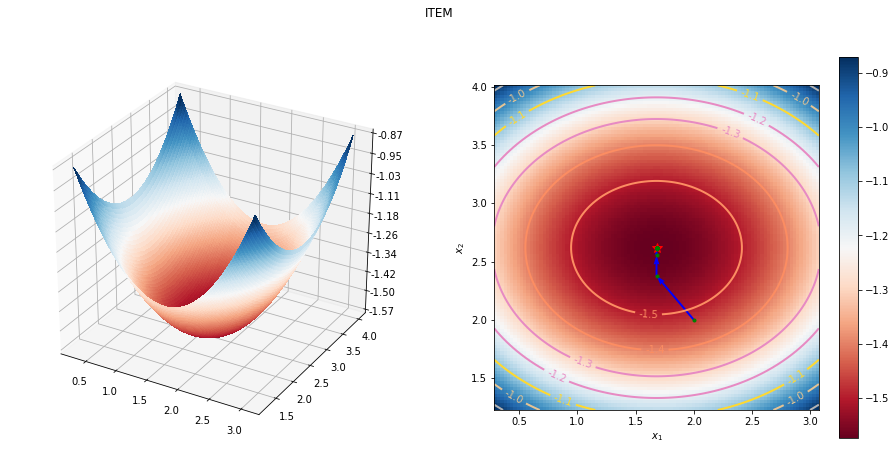

In [10]:
from scipy.optimize import minimize_scalar



iterations = x
graph_size = 2*np.linalg.norm(optimal - x_0)
x1= np.linspace(optimal[0]-graph_size,optimal[0]+graph_size, 100)
x2 = np.linspace(optimal[1]-graph_size,optimal[1]+graph_size,100)
k=d
plot_3d_function(x_0, x1, x2, f, "ITEM", k, minima=optimal, iterations = iterations)

# Testing func_error from Nsteps

$f = - e^{-1/(1-|x|)}, |x| < 1 .$ Здесь $\mu = 0, L = 1$
https://math.stackexchange.com/questions/4091768/proof-involving-the-sum-of-l-smooth-functions?rq=1

In [ ]:
d = 10

def grad(x):
  return 1/2*(A+A.T) @ x - b

def f(x):
  return 1/2*(x.T @ A @ x) - x.T @ b

In [ ]:
from scipy.optimize import basinhopping
from scipy.optimize import minimize
# ret = basinhopping(f, x_0)

d=500
Nsteps = 1000
Ntrials = 1
scipy_min_points = np.zeros(Nsteps)
taylor_drori_points=np.zeros(Nsteps)
grad_points = np.zeros(Nsteps)
ogm1_points = np.zeros(Nsteps)
ogm2_points = np.zeros(Nsteps)
tmm_points = np.zeros(Nsteps)
fgm1_points = np.zeros(Nsteps)
fgm2_points = np.zeros(Nsteps)

# print(f'scipy minimize: func={ret.fun}, njev={ret.njev}')
# print(f'taylor_drori: func={f(x[-1])}, njev={njev}'

for i in range(Ntrials):
    print(f'trial={i}/{Ntrials}')
    l = np.random.random_sample(d)
    b = np.random.random_sample(d)
    # b = np.zeros(d)
    A = np.diag(l)
    if np.unique(l).size != l.size:
      continue

    mu = np.min(l)
    L = np.max(l)
    optimal = 2*np.linalg.inv(A+A.T)@b
    optimal_func = f(optimal)

    x_0 = optimal + np.ones(d)*10

    # нормируем на квадрат расстояния до оптимума
    sq_distance = np.linalg.norm(x_0-optimal)**2
    sq_distance = 1

    y,x,z, njev = taylor_drori(grad, x_0, mu,L, Nsteps)
    taylor_drori_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]

    x = gradient_descent(grad, x_0, 2./(mu+L), Nsteps)
    grad_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1,x.shape[0])]

    x, njev = OGM1(grad, x_0, mu , L, Nsteps)
    ogm1_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]

    tmm_res, njev = TMM(grad, x_0, mu , L, Nsteps)
    tmm_points += [(f(tmm_res[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]

    x, njev = FGM1(grad, x_0, mu , L, Nsteps)
    fgm1_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1,njev+1)]


grad_points/= Ntrials
ogm1_points /= Ntrials
ogm2_points /= Ntrials
tmm_points /= Ntrials
fgm1_points /= Ntrials
fgm2_points /= Ntrials
taylor_drori_points /= Ntrials


trial=0/1


In [ ]:
optimal = 2*np.linalg.inv(A+A.T)@b
print(f(optimal))

-522.0549672758697


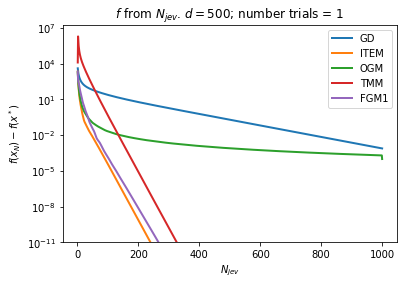

In [ ]:
import matplotlib.pyplot as plt
# plt.scatter(*zip(*scipy_min_points), label = 'Scipy minimize')
# plt.scatter(*zip(*grad_points) , label= 'Gradient descent')
# plt.scatter(*zip(*taylor_drori_points) , label= 'ITEM')
# plt.scatter(*zip(*ogm_points) , label= 'OGM')
# plt.scatter(*zip(*tmm_points) , label= 'TMM')

X = np.arange(1, Nsteps+1)
linewidth = 2
plt.plot(X,grad_points , label= 'GD', linewidth=linewidth)
plt.plot(X, taylor_drori_points , label= 'ITEM',linewidth=linewidth)
plt.plot(X, ogm1_points , label= 'OGM', linewidth=linewidth)
plt.plot(X, tmm_points , label= 'TMM', linewidth=linewidth)
plt.plot(X, fgm1_points , label= 'FGM1', linewidth=linewidth)


plt.xlabel('$N_{{jev}}$')
plt.ylabel('${f(x_N) - f(x^*)}$')
plt.yscale('log')
# plt.xscale('log')
plt.ylim((1e-11, None))
plt.legend(markerscale = 10)
plt.title(f'$f$ from $N_{{jev}}$. $ d={d}$; number trials = {Ntrials}')
plt.savefig(f"d1={d}.png")
plt.show()

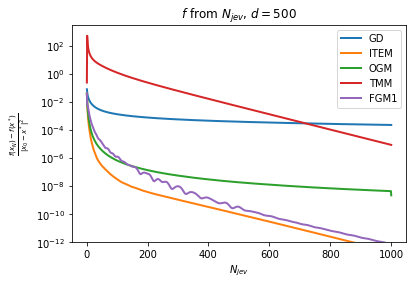

In [ ]:
import matplotlib.pyplot as plt
# plt.scatter(*zip(*scipy_min_points), label = 'Scipy minimize')
# plt.scatter(*zip(*grad_points) , label= 'Gradient descent')
# plt.scatter(*zip(*taylor_drori_points) , label= 'ITEM')
# plt.scatter(*zip(*ogm_points) , label= 'OGM')
# plt.scatter(*zip(*tmm_points) , label= 'TMM')

X = np.arange(1, Nsteps+1)
linewidth = 2
plt.plot(X,grad_points , label= 'GD', linewidth=linewidth)
plt.plot(X, taylor_drori_points , label= 'ITEM',linewidth=linewidth)
plt.plot(X, ogm1_points , label= 'OGM', linewidth=linewidth)
plt.plot(X, tmm_points , label= 'TMM', linewidth=linewidth)
plt.plot(X, fgm1_points , label= 'FGM1', linewidth=linewidth)

plt.xlabel('$N_{{jev}}$')
plt.ylabel('$\\frac{f(x_N) - f(x^*)}{\|x_0 - x^*\|^2}$')
plt.yscale('log')
# plt.xscale('log')
plt.ylim((1e-12, None))
plt.legend(markerscale = 10)
plt.title(f'$f$ from $N_{{jev}}$, $ d={d}$')
plt.savefig(f"d1={d}.png")
plt.show()

trial=0/1


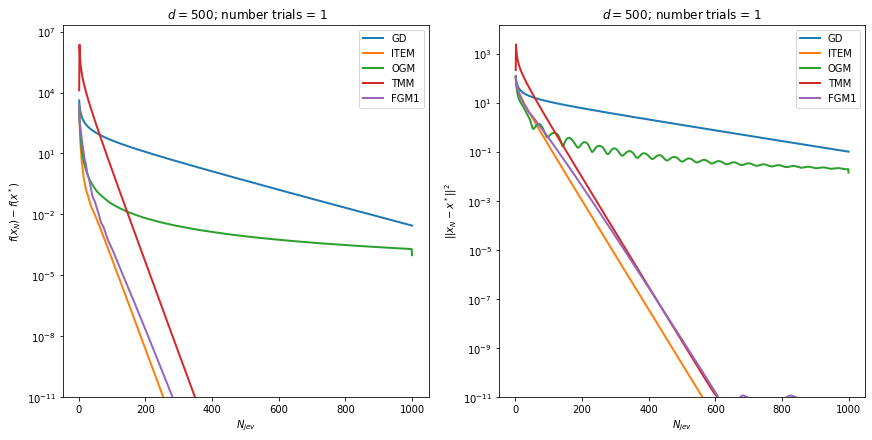

<Figure size 432x288 with 0 Axes>

In [ ]:
from scipy.optimize import basinhopping
from scipy.optimize import minimize
from numpy.linalg import norm
# ret = basinhopping(f, x_0)

d=500
Nsteps = 1000
Ntrials = 1
scipy_min_points = np.zeros(Nsteps)
taylor_drori_points=np.zeros(Nsteps)
grad_points = np.zeros(Nsteps)
ogm1_points = np.zeros(Nsteps)
ogm2_points = np.zeros(Nsteps)
tmm_points = np.zeros(Nsteps)
fgm1_points = np.zeros(Nsteps)
fgm2_points = np.zeros(Nsteps)

# print(f'scipy minimize: func={ret.fun}, njev={ret.njev}')
# print(f'taylor_drori: func={f(x[-1])}, njev={njev}'

for i in range(Ntrials):
    print(f'trial={i}/{Ntrials}')
    l = np.random.random_sample(d)
    b = np.random.random_sample(d)
    # b = np.zeros(d)
    A = np.diag(l)
    if np.unique(l).size != l.size:
      continue

    mu = np.min(l)
    L = np.max(l)
    optimal = 2*np.linalg.inv(A+A.T)@b
    optimal_func = f(optimal)

    x_0 = optimal + np.ones(d)*10


    y,x,z, njev = taylor_drori(grad, x_0, mu,L, Nsteps)
    taylor_drori_points += [norm(z[i] - optimal) for i in range(1, njev+1)]

    x = gradient_descent(grad, x_0, 2./(mu+L), Nsteps)
    grad_points += [norm(x[i] - optimal) for i in range(1,x.shape[0])]

    x, njev = OGM1(grad, x_0, mu , L, Nsteps)
    ogm1_points += [norm(x[i] - optimal) for i in range(1, njev+1)]

    tmm_res, njev = TMM(grad, x_0, mu , L, Nsteps)
    tmm_points += [norm(tmm_res[i] - optimal) for i in range(1, njev+1)]

    x, njev = FGM1(grad, x_0, mu , L, Nsteps)
    fgm1_points += [norm(x[i] - optimal) for i in range(1,njev+1)]

    grad_points_norm = grad_points
    ogm_points_norm = ogm1_points
    tmm_points_norm = tmm_points 
    fgm_points_norm = fgm1_points
    taylor_points_norm = taylor_drori_points 

    scipy_min_points = np.zeros(Nsteps)
    taylor_drori_points=np.zeros(Nsteps)
    grad_points = np.zeros(Nsteps)
    ogm1_points = np.zeros(Nsteps)
    tmm_points = np.zeros(Nsteps)
    fgm1_points = np.zeros(Nsteps)

    sq_distance = 1

    y,x,z, njev = taylor_drori(grad, x_0, mu,L, Nsteps)
    taylor_drori_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]

    x = gradient_descent(grad, x_0, 2./(mu+L), Nsteps)
    grad_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1,x.shape[0])]

    x, njev = OGM1(grad, x_0, mu , L, Nsteps)
    ogm1_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]

    tmm_res, njev = TMM(grad, x_0, mu , L, Nsteps)
    tmm_points += [(f(tmm_res[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]

    x, njev = FGM1(grad, x_0, mu , L, Nsteps)
    fgm1_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1,njev+1)]

    grad_points_func = grad_points
    ogm_points_func = ogm1_points
    tmm_points_func = tmm_points 
    fgm_points_func = fgm1_points
    taylor_points_func = taylor_drori_points 

import matplotlib.pyplot as plt
# plt.scatter(*zip(*scipy_min_points), label = 'Scipy minimize')
# plt.scatter(*zip(*grad_points) , label= 'Gradient descent')
# plt.scatter(*zip(*taylor_drori_points) , label= 'ITEM')
# plt.scatter(*zip(*ogm_points) , label= 'OGM')
# plt.scatter(*zip(*tmm_points) , label= 'TMM')

fig = plt.figure(constrained_layout=True, figsize=(12,6))
ax = fig.subplots(1, 2, squeeze=False)

X = np.arange(1, Nsteps+1)
linewidth = 2
ax[0,0].plot(X,grad_points_func , label= 'GD', linewidth=linewidth)
ax[0,0].plot(X, taylor_points_func , label= 'ITEM',linewidth=linewidth)
ax[0,0].plot(X, ogm_points_func , label= 'OGM', linewidth=linewidth)
ax[0,0].plot(X, tmm_points_func , label= 'TMM', linewidth=linewidth)
ax[0,0].plot(X, fgm_points_func , label= 'FGM1', linewidth=linewidth)

ax[0,0].set_xlabel('$N_{{jev}}$')
ax[0,0].set_ylabel('${f(x_N) - f(x^*)}$')
ax[0,0].set_yscale('log')
# ax[0,0]lt.xscale('log')
ax[0,0].set_ylim((1e-11, None))
ax[0,0].legend(markerscale = 10)
ax[0,0].set_title(f' $ d={d}$; number trials = {Ntrials}')


X = np.arange(1, Nsteps+1)
linewidth = 2
ax[0,1].plot(X, grad_points_norm , label= 'GD', linewidth=linewidth)
ax[0,1].plot(X,  taylor_points_norm , label= 'ITEM',linewidth=linewidth)
ax[0,1].plot(X,  ogm_points_norm , label= 'OGM', linewidth=linewidth)
ax[0,1].plot(X,  tmm_points_norm , label= 'TMM', linewidth=linewidth)
ax[0,1].plot(X,  fgm_points_norm , label= 'FGM1', linewidth=linewidth)
ax[0,1].set_xlabel('$N_{{jev}}$')
ax[0,1].set_ylabel('${||x_N - x^*||^2}$')
ax[0,1].set_yscale('log')
# plt.xscale('log')
ax[0,1].set_ylim((1e-11, None))
ax[0,1].legend(markerscale = 10)
ax[0,1].set_title(f'$ d={d}$; number trials = {Ntrials}')


plt.show()
plt.savefig(f"d1={d}.png")


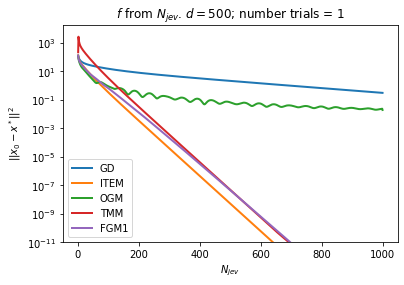

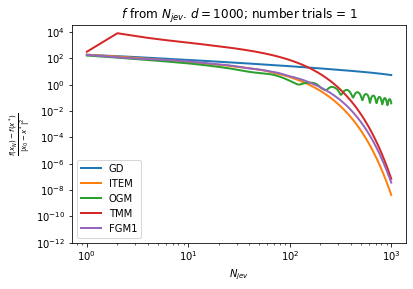

In [ ]:
import matplotlib.pyplot as plt
# plt.scatter(*zip(*scipy_min_points), label = 'Scipy minimize')
# plt.scatter(*zip(*grad_points) , label= 'Gradient descent')
# plt.scatter(*zip(*taylor_drori_points) , label= 'ITEM')
# plt.scatter(*zip(*ogm_points) , label= 'OGM')
# plt.scatter(*zip(*tmm_points) , label= 'TMM')

X = np.arange(1, Nsteps+1)
linewidth = 2
plt.plot(X,grad_points , label= 'GD', linewidth=linewidth)
plt.plot(X, taylor_drori_points , label= 'ITEM',linewidth=linewidth)
plt.plot(X, ogm1_points , label= 'OGM', linewidth=linewidth)
plt.plot(X, tmm_points , label= 'TMM', linewidth=linewidth)
plt.plot(X, fgm1_points , label= 'FGM1', linewidth=linewidth)

plt.xlabel('$N_{{jev}}$')
plt.ylabel('$\\frac{f(x_N) - f(x^*)}{\|x_0 - x^*\|^2}$')
plt.yscale('log')
plt.xscale('log')
plt.ylim((1e-12, None))
plt.legend(markerscale = 10)
plt.title(f'$f$ from $N_{{jev}}$. $ d={d}$; number trials = {Ntrials}')
plt.savefig(f"d1={d}.png")
plt.show()

# Methods' implementation depending on function Error

In [ ]:
import math
import numpy as np

In [ ]:
def taylor_drori2(grad, x_0, mu, L, optimal, eps=1e-7, maxiter=10000):
  z = []
  x = []
  y = []
  A = []
  delta = []
  b = []
  z.append(x_0)
  x.append(x_0)
  y.append(x_0)
  A.append(0)
  q = mu/L
  if q ==1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
  k=0
  while abs(f(optimal) - f(x[k]))>eps and k<maxiter :
    A.append(((1+q)*A[k]+2*(1+np.sqrt((1+A[k])*(1+q*A[k]))))/(1-q)**2)
    b.append(A[k]/((1-q)*A[k+1]))
    delta.append(1/2.*(((1-q)**2)*A[k+1]-(1+q)*A[k])/(1+q+q*A[k]))
    y.append((1-b[k])*z[k]+b[k]*x[k])
    x.append(y[k]-1/L*grad(y[k]))
    z.append((1-q*delta[k])*z[k]+q*delta[k]*y[k]- delta[k]/L*grad(y[k]))
    k+=1
  njev = k
  return y,x,z, njev
# y for optimizing function values, while z for disctance to the optimal solution


In [ ]:
def gradient_descent2(grad, x_0, step, optimal, eps=1e-7, maxiter=10000):
    w = [x_0]
    i=0
    while abs(f(optimal) - f(x[i]))>eps and i<maxiter:
      w.append(w[i]-step*grad(w[i]))
      i+=1
    return w, i

In [ ]:
def TMM2(grad, x_0, mu, L, optimal, eps=1e-7, maxiter=10000):
  q = mu/L
  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
  if q==0 :
    print(f"TTM is undefined, mu == 0")
    return None, None, None
  ro = 1-np.sqrt(q)
  alpha = (1+ro)/L
  beta = ro**2/(2-ro)
  gamma = ro**2/((1+ro)*(2-ro))
  delta = ro**2/(1-ro**2)

  ksi = []
  x =[]
  y = []
  
  ksi.append(x_0)
  ksi.append(x_0)
  x.append(x_0)
  y.append(x_0)
  k=0
  while abs(f(optimal) - f(x[k]))>eps and k<maxiter:
    y.append((1+gamma)*ksi[k+1] - gamma*ksi[k])
    x.append((1+delta)*ksi[k+1] - delta*ksi[k])
    ksi.append((1+beta)*ksi[k+1] - beta*ksi[k]-alpha*grad(y[k+1]))
    k+=1

  njev = N
  return x, njev

In [ ]:
def FGM2(grad, x_0, mu, L, optimal, eps=1e-7, maxiter=10000):
  q = mu/L
  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
  if q==0 :
    print(f"TTM is undefined, mu == 0")
    return None, None, None
  ro = 1-np.sqrt(q)
  alpha = (1+ro)/L
  beta = ro**2/(2-ro)
  gamma = ro**2/((1+ro)*(2-ro))
  delta = ro**2/(1-ro**2)

  ksi = np.empty((N+2, x_0.shape[0]))
  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N+1, x_0.shape[0]))
  
  ksi[0] = ksi[1] = x_0
  x[0]=y[0]= x_0

  for k in range(N):
    y[k+1] = (1+gamma)*ksi[k+1] - gamma*ksi[k]
    x[k+1] = (1+delta)*ksi[k+1] - delta*ksi[k]
    ksi[k+2] = (1+beta)*ksi[k+1] - beta*ksi[k]-alpha*grad(y[k+1])

  njev = k
  return x, njev

In [ ]:
def OGM2(grad, x_0, mu, L, optimal, eps=1e-7, maxiter=10000):
  q = mu/L
  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
    
  x =[x_0]
  y =[x_0]
  z =[x_0]
  teta = [1]

  i=0
  while abs(f(optimal) - f(x[i]))>eps and i<maxiter:
    y.append(x[i] - 1/L*grad(x[i]))

    teta.append((1+np.sqrt(4*teta[i]**2 + 1))/2)
    # if i == N-1:
    #   teta[N] =  (1+np.sqrt(8*teta[N-1]**2 + 1))/2      
    x.append( y[i+1] + (teta[i]-1)/teta[i+1]*(y[i+1]- y[i]) + teta[i]/teta[i+1]*(y[i+1]-x[i]))
    i+=1
  njev = i
  return x, njev

# Testing Nsteps from dimension

In [ ]:
def grad(x):
  return 1/2*(A+A.T) @ x - b

def f(x):
  return 1/2*(x.T @ A @ x) - x.T @ b

In [ ]:
from scipy.optimize import basinhopping
from scipy.optimize import minimize
# ret = basinhopping(f, x_0)
        
# print(f'scipy minimize: func={ret.fun}, njev={ret.njev}')
# print(f'taylor_drori: func={f(x[-1])}, njev={njev}'
Nsteps = 10000
Ntrials = 10
scipy_min_points = []
taylor_drori_points= []
grad_points = []
ogm_points = []
tmm_points = []
fgm_points = []
d_points = np.arange(10, 500, 50)
eps = 1e-12

for d in d_points:
    print(f'dim={d}')
    l = np.random.random_sample(d)
    b = np.random.random_sample(d)
    # b = np.zeros(d)
    A = np.diag(l)
    if np.unique(l).size != l.size:
      continue


    mu = np.min(l)
    L = np.max(l)
    optimal = 2*np.linalg.inv(A+A.T)@b
    optimal_func = f(optimal)

    x_0 = optimal + np.ones(d)*10

    # ret1 = minimize(f, x_0, jac=grad, options={"maxiter":N})
    # scipy_min_points.append((ret1.njev,abs(ret1.fun-optimal_func)))
    
    y,x,z,njev1 = taylor_drori2(grad, x_0, mu,L, optimal, eps, Nsteps)
    print(njev1)
    taylor_drori_points.append((d, njev1))

    x, njev2 = gradient_descent2(grad, x_0, 2./(mu+L), optimal, eps, Nsteps)
    print(d, njev2)
    grad_points.append((d, njev2))

    x, njev = OGM2(grad, x_0, mu , L, optimal, eps, Nsteps)
    ogm_points.append((d, njev))

    x, njev = TMM2(grad, x_0, mu , L, optimal, eps, Nsteps)
    tmm_points.append((d, njev))

    # x, njev = FGM(grad, x_0, mu , L,  optimal, eps, Nsteps)
    # fgm_points += [(i,abs(f(x[i]) - optimal_func)) for i in range(1,njev+1)]



2232
260 2232


KeyboardInterrupt: ignored

In [ ]:
optimal = 2*np.linalg.inv(A+A.T)@b
print(f(optimal))

-140.80275420590138


In [ ]:
print(grad_points)

[(10, 402), (60, 653), (110, 2280), (160, 1737), (210, 2077), (260, 2143), (310, 2107), (360, 2136), (410, 2195), (460, 2152)]


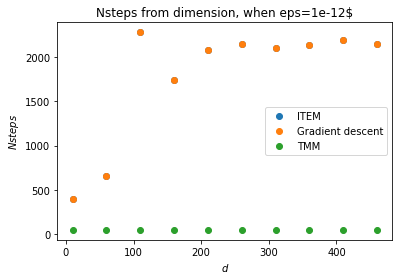

In [ ]:
import matplotlib.pyplot as plt
# plt.scatter(*zip(*scipy_min_points), label = 'Scipy minimize')
# plt.scatter(*zip(*grad_points) , label= 'Gradient descent')
# plt.scatter(*zip(*taylor_drori_points) , label= 'ITEM')
# plt.scatter(*zip(*ogm_points) , label= 'OGM')
# plt.scatter(*zip(*tmm_points) , label= 'TMM')

X = np.arange(1, Nsteps+1)
plt.scatter(*zip(*taylor_drori_points) , label= 'ITEM')
plt.scatter(*zip(*grad_points) , label= 'Gradient descent')
# plt.scatter(*zip(*ogm_points) , label= 'OGM')
# plt.scatter(*zip(*fgm_points) , label= 'FGM')
plt.scatter(*zip(*tmm_points) , label= 'TMM')

plt.xlabel('$d$')
plt.ylabel('$Nsteps$')
plt.legend()
plt.title(f'Nsteps from dimension, when eps={eps}$')
plt.savefig(f"d1={d}.png")
plt.show()

In [ ]:
plt.scatter(*zip(*scipy_min_points), label = 'Scipy minimize')
plt.scatter(*zip(*taylor_drori_points) , label= 'Taylor-Drori')
plt.scatter(*zip(*grad_points) , label= 'Gradient descent')
plt.xlabel('$N_{{jev}}$')
plt.ylabel('$func$')
plt.yscale('log')
plt.legend()
plt.title(f'f from $N_{{jev}}, d={d}$')
plt.savefig(f"d1={d}.png")
plt.show()

TypeError: ignored

# Adaptive ITEM 

In [15]:
from numpy.linalg import norm

def ACGM(method, grad, x_0, L_0, mu_0, beta, eps, maxiter = 10000):
  x = np.zeros((maxiter+1, x_0.size))
  history = []
  mu = np.zeros(maxiter+1)
  mu[0] = mu_0
  x[0] = x_0
  history.append(x_0)
  Njev = 0
  for k in range(1, maxiter+1):
    if norm(grad(x[k-1])) < eps:
      break
    mu[k] =  beta*mu[k-1]

    while True:
      Nsteps = int(2*np.sqrt(2*L/mu[k])) + 1 #согласно статье https://arxiv.org/pdf/2009.03971.pdf
      print(mu[k], L, Nsteps)
      # print(f(x[k-1]) - optimal_func)
      y,x_res,z_res, njev = method(grad, x[k-1], mu[k] ,L, Nsteps)
      Njev += njev
      history += list(x_res[1:])

      x[k] = z_res[-1]
      if norm(grad(x[k])) <= 1/2*norm(grad(x[k-1])):
        # print(1)
        break
      mu[k] /= beta
      if norm(grad(x[k])) < norm(grad(x[k-1])):
        # print(2, x[k])
        x[k-1] = x[k]
  Njev += k
  return x[:k], Njev, history

_, njev, hist = ACGM(taylor_drori, grad, x_0, L, mu, 4, 1e-1)


0.4 50000 1001
1.6 50000 501
6.4 50000 251
1.6 50000 501
0.4 50000 1001


In [17]:
len(hist)

3256

In [16]:
def ITEM_Lipschitz(f, grad, x_0, mu, L, N):
  z = np.empty((N+1, x_0.shape[0]))
  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N, x_0.shape[0]))
  A = np.empty((N+1, 1))
  delta = np.empty((N, 1))
  b = np.empty((N, 1))
  z[0] = x_0
  x[0]=x_0
  y[0] = x_0
  A[0] = 0
  L /= 2
  flag = True
  while flag:
    q = mu/L
    if q ==1:
      print(f"mu can't equal to L (trivial case)")
      return None, None, None  
    flag = False
    for k in range(N):
      A[k+1]=(((1+q)*A[k]+2*(1+np.sqrt((1+A[k])*(1+q*A[k]))))/(1-q)**2)
      b[k]=(A[k]/((1-q)*A[k+1]))
      delta[k]=(1/2.*(((1-q)**2)*A[k+1]-(1+q)*A[k])/(1+q+q*A[k]))
      y[k]=((1-b[k])*z[k]+b[k]*x[k])
      x[k+1]=(y[k]-1/L*grad(y[k]))
      if f(x[k+1]) > f(y[k]) - 1/(2*L)*np.linalg.norm(grad(y[k]))**2:
        L *= 2
        flag = True
        break
      z[k+1]=((1-q*delta[k])*z[k]+q*delta[k]*y[k]- delta[k]/L*grad(y[k]))
  return y,x,z, L
# y for optimizing function values, while z for disctance to the optimal solution



In [18]:
def ALGM(method, f, grad, x_0, L_0, mu_0, beta, eps, maxiter = 10000):
  x = np.zeros((maxiter+1, x_0.size))
  mu = np.zeros(maxiter+1)
  L = np.zeros(maxiter+1)
  history = []
  history.append(x_0)
  mu[0] = mu_0
  L[0] = L_0
  x[0] = x_0
  Njev = 0
  for k in range(1, maxiter+1):
    if norm(grad(x[k-1])) < eps:
      break
    mu[k] =  beta*mu[k-1]

    while True:
      Nsteps = int(np.sqrt(8*L[k-1]/mu[k])) + 1 #согласно статье https://arxiv.org/pdf/2009.03971.pdf
      # print(Nsteps)
      # print(f(x[k-1]) - optimal_func)
      y,x_res,z_res, L[k] = method(f, grad, x[k-1], mu[k] ,L[k-1], Nsteps)
      history += list(x_res[1:])
      # print( y[-1], L[k])
      x[k] = y[-1]
      Njev += Nsteps
      mu[k] = mu[k]*L[k]/L[k-1]
      if norm(grad(x[k])) <= 1/2*norm(grad(x[k-1])):
        # print(1)
        break
      mu[k] /= beta
      if norm(grad(x[k])) < norm(grad(x[k-1])):
        
        # print(2, x[k])
        x[k-1] = x[k]
  # print(mu[:k])
  Njev += k
  print(L)
  return x[:k], Njev, history
    

In [167]:
_, njev, hist = ALGM(ITEM_Lipschitz,f,  grad, x_0, L, mu, 4, 1e-1)
print(njev, len(hist))

5201 5199


График сходимости на квадратичной функции адаптивных алгоритмов и ITEM

trial=0/1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


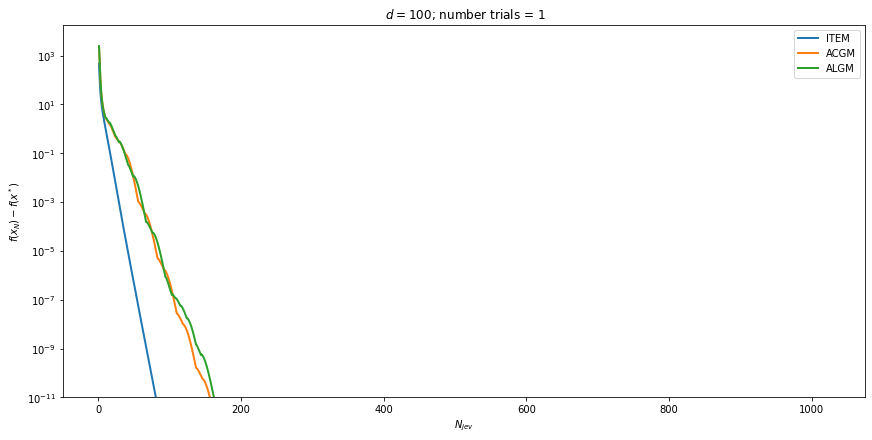

<Figure size 432x288 with 0 Axes>

In [ ]:
from scipy.optimize import basinhopping
from scipy.optimize import minimize
from numpy.linalg import norm
# ret = basinhopping(f, x_0)

d=100
Nsteps = 10000
Ntrials = 1
scipy_min_points = np.zeros(Nsteps)
grad_points = np.zeros(Nsteps)
ogm1_points = np.zeros(Nsteps)
ogm2_points = np.zeros(Nsteps)
tmm_points = np.zeros(Nsteps)
fgm1_points = np.zeros(Nsteps)
fgm2_points = np.zeros(Nsteps)
taylor_drori_points=np.zeros(Nsteps)
aitem_points = np.zeros(Nsteps)
algm_points = np.zeros(Nsteps)
# print(f'scipy minimize: func={ret.fun}, njev={ret.njev}')
# print(f'taylor_drori: func={f(x[-1])}, njev={njev}'

for i in range(Ntrials):
    print(f'trial={i}/{Ntrials}')
    l = np.random.random_sample(d)
    b = np.random.random_sample(d)
    # b = np.zeros(d)
    A = np.diag(l)
    if np.unique(l).size != l.size:
      continue

    mu = np.min(l)
    L = np.max(l)
    optimal = 2*np.linalg.inv(A+A.T)@b
    optimal_func = f(optimal)

    x_0 = optimal + np.ones(d)*10



    sq_distance = 1

    y,x,z, njev = taylor_drori(grad, x_0, mu,L, Nsteps)
    taylor_drori_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]


    _, njev, x = ACGM(taylor_drori, grad, x_0, L, mu, 4, 1e-6)
    aitem_points = [(f(x[i]) - optimal_func)/sq_distance for i in range(len(x))]

    _, njev, x = ALGM(ITEM_Lipschitz,f,  grad, x_0, L, mu, 4, 1e-6)
    algm_points = [(f(x[i]) - optimal_func)/sq_distance for i in range(len(x))]
    

    grad_points_func = grad_points
    ogm_points_func = ogm1_points
    tmm_points_func = tmm_points 
    fgm_points_func = fgm1_points
    taylor_points_func = taylor_drori_points
    aitem_points_func = aitem_points
    algm_points_func = algm_points


import matplotlib.pyplot as plt
fig = plt.figure(constrained_layout=True, figsize=(12,6))
ax = fig.subplots(1, 1, squeeze=False)

X = np.arange(1, Nsteps+1)
linewidth = 2
ax[0,0].plot(X, taylor_points_func , label= 'ITEM',linewidth=linewidth)
ax[0,0].plot(X[:len(aitem_points_func)], aitem_points_func , label= 'ACGM', linewidth=linewidth)
ax[0,0].plot(X[:len(algm_points_func)], algm_points_func , label= 'ALGM', linewidth=linewidth)

ax[0,0].set_xlabel('$N_{{jev}}$')
ax[0,0].set_ylabel('${f(x_N) - f(x^*)}$')
ax[0,0].set_yscale('log')
# ax[0,0]lt.xscale('log')
ax[0,0].set_ylim((1e-11, None))
ax[0,0].legend(markerscale = 10)
ax[0,0].set_title(f' $ d={d}$; number trials = {Ntrials}')


# X = np.arange(1, Nsteps+1)
# linewidth = 2
# ax[0,1].plot(X, grad_points_norm , label= 'GD', linewidth=linewidth)
# ax[0,1].plot(X,  taylor_points_norm , label= 'ITEM',linewidth=linewidth)
# ax[0,1].plot(X,  ogm_points_norm , label= 'OGM', linewidth=linewidth)
# ax[0,1].plot(X,  tmm_points_norm , label= 'TMM', linewidth=linewidth)
# ax[0,1].plot(X,  fgm_points_norm , label= 'FGM1', linewidth=linewidth)
# ax[0,1].set_xlabel('$N_{{jev}}$')
# ax[0,1].set_ylabel('${||x_N - x^*||^2}$')
# ax[0,1].set_yscale('log')
# # plt.xscale('log')
# ax[0,1].set_ylim((1e-11, None))
# ax[0,1].legend(markerscale = 10)

# ax[0,1].set_title(f'$ d={d}$; number trials = {Ntrials}')


plt.show()
plt.savefig(f"d1={d}.png")


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import scipy
from scipy.sparse.linalg import cg
from scipy.io import mmread
import numpy as np

In [38]:

with open('/content/drive/MyDrive/Colab Notebooks/494_bus.mtx', 'rb') as file:
  A = mmread(file)
  A = A.toarray()

Nsteps = 10000

taylor_drori_points=np.zeros(Nsteps)
aitem_points = np.zeros(Nsteps)
algm_points = np.zeros(Nsteps)

optimal = np.random.standard_normal(A.shape[0])
b =  np.dot(A,optimal)

optimal_func = f(optimal)
x_0 = np.zeros(optimal.shape[0])
sq_distance = 1
mu = np.min(np.diag(A))/2
L = np.max(np.diag(A))*2

y,x,z, njev = taylor_drori(grad, x_0, mu,L, Nsteps)
taylor_drori_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]
print(x)

_, njev, x = ACGM(taylor_drori, grad, x_0, L, mu, 4, 1e-2)
aitem_points = [(f(x[i]) - optimal_func)/sq_distance for i in range(len(x))]

_, njev, x = ALGM(ITEM_Lipschitz,f,  grad, x_0, L, mu, 4, 1e-2)
algm_points = [(f(x[i]) - optimal_func)/sq_distance for i in range(len(x))]


taylor_points_func = taylor_drori_points
aitem_points_func = aitem_points
algm_points_func = algm_points




[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.34591736e-01  4.58951245e-04  4.55796466e-04 ... -2.62365449e-03
   1.83526315e-03 -2.49122075e-03]
 [ 3.40277519e-01  1.19617203e-03  1.19302973e-03 ... -6.85782877e-03
   4.72330585e-03 -6.30563632e-03]
 ...
 [ 2.41934082e+00  1.92851675e+00  1.95983531e+00 ... -9.24314714e-01
   7.98822053e-02 -2.90837806e-01]
 [ 2.41934082e+00  1.92851700e+00  1.95983558e+00 ... -9.24314465e-01
   7.98824530e-02 -2.90837558e-01]
 [ 2.41934082e+00  1.92851725e+00  1.95983584e+00 ... -9.24314217e-01
   7.98827007e-02 -2.90837311e-01]]
0.3407154 40015.42 970
1.3628616 40015.42 485
5.4514464 40015.42 243
1.3628616 40015.42 485
0.3407154 40015.42 970
1.3628616 40015.42 485
0.3407154 40015.42 970
[40015.42 40015.42 40015.42 ...     0.       0.       0.  ]


In [39]:
import scipy
from scipy.sparse.linalg import cg
from scipy.io import mmread
import numpy as np

def callback(xk):
  global callback_res
  callback_res.append(f(xk)-optimal_func)


callback_res = [f(x_0)-optimal_func]
res = cg(A, b, callback=callback, tol = 1e-12, x0=x_0)
cg_points_func = callback_res

In [40]:
print(np.max(np.diag(A)),np.min(np.diag(A)))

20007.71 0.1703577


Text(0.5, 1.0, 'Adaptive algorithms convergence rate')

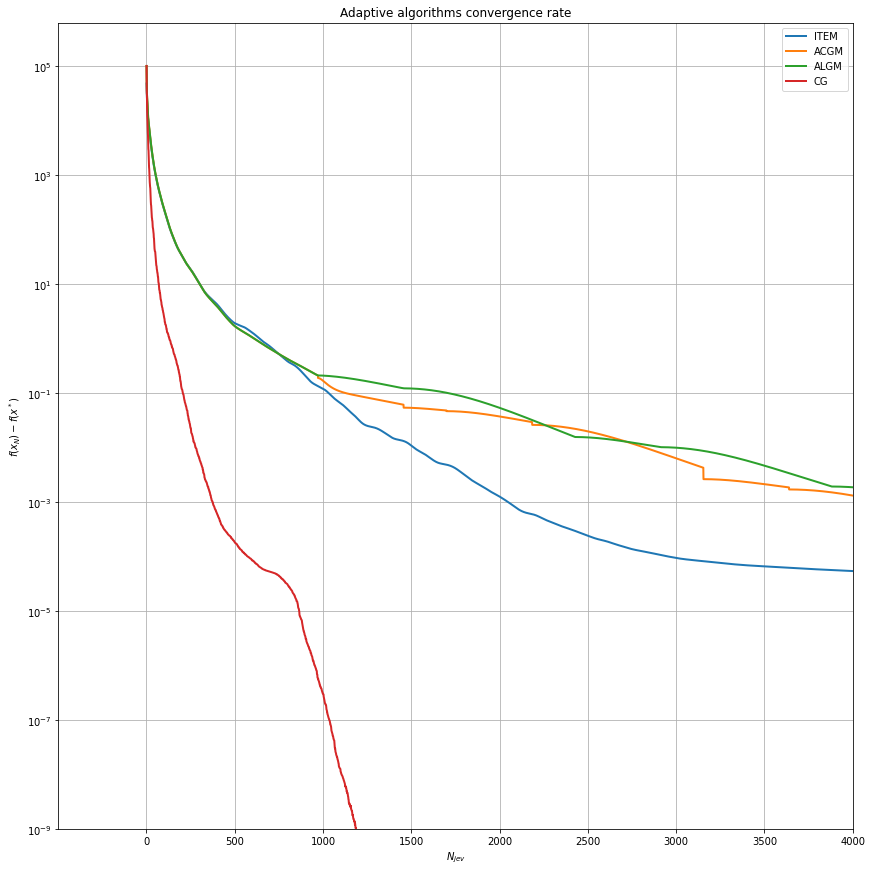

In [44]:
fig = plt.figure(constrained_layout=True, figsize=(12,12))
ax = fig.subplots(1, 1, squeeze=False)

X = np.arange(1, Nsteps+100000)
linewidth = 2
ax[0,0].plot(X[:len(taylor_points_func)], taylor_points_func , label= 'ITEM',linewidth=linewidth)
ax[0,0].plot(X[:len(aitem_points_func)], aitem_points_func , label= 'ACGM', linewidth=linewidth)
ax[0,0].plot(X[:len(algm_points_func)], algm_points_func , label= 'ALGM', linewidth=linewidth)
ax[0,0].plot(X[:len(cg_points_func)], cg_points_func , label= 'CG', linewidth=linewidth)

ax[0,0].set_xlabel('$N_{{jev}}$')
ax[0,0].set_ylabel('${f(x_N) - f(x^*)}$')
ax[0,0].set_yscale('log')
# ax[0,0].set_xscale('log')
ax[0,0].set_ylim((1e-9, None))
ax[0,0].set_xlim((None, 4000))
ax[0,0].legend(markerscale = 10)
ax[0,0].grid()
ax[0,0].set_title(f'Adaptive algorithms convergence rate')

In [ ]:
taylor_points_func

array([4.78339680e+013, 9.77274655e+022, 3.29058722e+032, 1.35789440e+042,
       6.22089509e+051, 3.02741554e+061, 1.52942584e+071, 7.91553679e+080,
       4.16306402e+090, 2.21349816e+100, 1.18576110e+110, 6.38512868e+119,
       3.45075973e+129, 1.86965507e+139, 1.01480442e+149, 5.51503440e+158,
       2.99984194e+168, 1.63275012e+178, 8.89063168e+187, 4.84262513e+197,
       2.63830346e+207, 1.43759407e+217, 7.83421748e+226, 4.26961577e+236,
       2.32705090e+246, 1.26835226e+256, 6.91330728e+265, 3.76825511e+275,
       2.05400133e+285, 1.11960641e+295, 6.10285471e+304,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,  

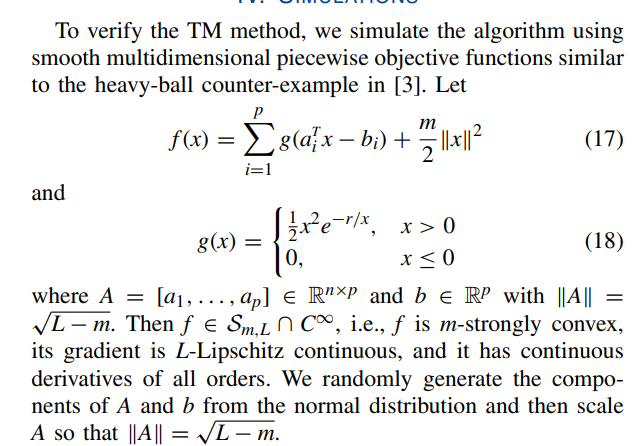

In [296]:
n = 100
p=5
L = 10000
m=1
r  = 1e-6
A = np.random.randn(n, p)
A *= np.sqrt(L-m)/np.linalg.norm(A)
b = np.random.randn(p) 

def g(x):
  return 1/2*x**2*np.exp(-r/x)
  
def f(x):
  return np.sum(g(A.T@x-b)) + m/2*np.sum(x**2)


def grad(x):
  t0 = x.T@A-b.T
  t1 = np.exp(-r/t0)
  flag = (A.T@x-b>0)
  return np.sum(A * (t0*t1 + r*t1/2)*flag, axis=1) + m*x


In [298]:
from scipy.optimize import basinhopping
from scipy.optimize import minimize
from numpy.linalg import norm
# ret = basinhopping(f, x_0)

d=n
Nsteps = 10000
Ntrials = 1
scipy_min_points = np.zeros(Nsteps)
taylor_drori_points=np.zeros(Nsteps)
grad_points = np.zeros(Nsteps)
ogm1_points = np.zeros(Nsteps)
ogm2_points = np.zeros(Nsteps)
tmm_points = np.zeros(Nsteps)
fgm1_points = np.zeros(Nsteps)
fgm2_points = np.zeros(Nsteps)
aitem_points = np.zeros(Nsteps)
algm_points = np.zeros(Nsteps)
# print(f'scipy minimize: func={ret.fun}, njev={ret.njev}')
# print(f'taylor_drori: func={f(x[-1])}, njev={njev}'

for i in range(Ntrials):
    print(f'trial={i}/{Ntrials}')
    
    optimal = np.zeros(n)
    optimal_func = 0

    x_0 =  -np.ones(n)

    # L*=2
    # mu/=2

    sq_distance = 1
    tmm_res, njev = TMM(grad, x_0, mu , L, Nsteps)
    tmm_points += [(f(tmm_res[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]
    x_0 = tmm_res[2]

    y,x,z, njev = taylor_drori(grad, x_0, mu,L, Nsteps)
    # taylor_drori_points += [np.linalg.norm(z[i] - optimal)/sq_distance for i in range(1, njev+1)]
    taylor_drori_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]


    # _, njev, x = ACGM(taylor_drori, grad, x_0, L, mu, 4, 1e-3)
    # aitem_points = [(f(x[i]) - optimal_func)/sq_distance for i in range(len(x))]
    # # aitem_points = [np.linalg.norm(x[i] - optimal)/sq_distance for i in range(len(x))]

    # _, njev, x = ALGM(ITEM_Lipschitz,f,  grad, x_0, L, mu, 4, 1e-3)
    # algm_points = [(f(x[i]) - optimal_func)/sq_distance for i in range(len(x))]
    # # algm_points = [np.linalg.norm(x[i] - optimal)/sq_distance for i in range(len(x))]
    
    x = gradient_descent(grad, x_0, 2./(mu+L), Nsteps)
    grad_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1,x.shape[0])]

    x, njev = OGM1(grad, x_0, mu , L, Nsteps)
    ogm1_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]


    x, njev = FGM1(grad, x_0, mu , L, Nsteps)
    fgm1_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1,njev+1)]


    grad_points_func = grad_points
    ogm_points_func = ogm1_points
    tmm_points_func = tmm_points 
    fgm_points_func = fgm1_points
    taylor_points_func = taylor_drori_points
    aitem_points_func = aitem_points
    algm_points_func = algm_points





trial=0/1


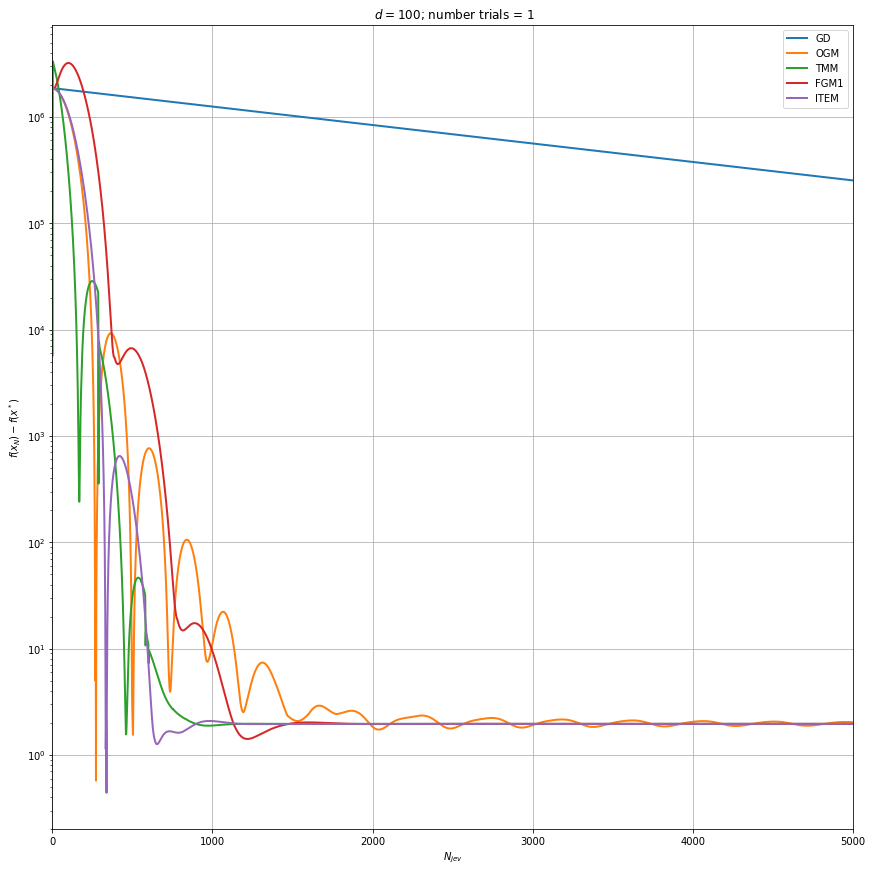

<Figure size 432x288 with 0 Axes>

In [303]:
import matplotlib.pyplot as plt
fig = plt.figure(constrained_layout=True, figsize=(12,12))
ax = fig.subplots(1, 1, squeeze=False)

X = np.arange(1, 10000 + 1)
linewidth = 2
# ax[0,0].plot(X[:len(aitem_points_func)], aitem_points_func, label= 'ACGM', linewidth=linewidth)
# ax[0,0].plot(X[:len(algm_points_func)], algm_points_func, label= 'ALGM', linewidth=linewidth)
ax[0,0].plot(X[:len(grad_points_func)],grad_points_func , label= 'GD', linewidth=linewidth)
ax[0,0].plot(X[:len(ogm_points_func)], ogm_points_func , label= 'OGM', linewidth=linewidth)
ax[0,0].plot(X[:len(tmm_points_func)], tmm_points_func , label= 'TMM', linewidth=linewidth)
ax[0,0].plot(X[:len(fgm_points_func)], fgm_points_func , label= 'FGM1', linewidth=linewidth)
ax[0,0].plot(X[:Nsteps], taylor_points_func, label= 'ITEM',linewidth=linewidth)


ax[0,0].set_xlabel('$N_{{jev}}$')
ax[0,0].set_ylabel('${f(x_N) - f(x^*)}$')
ax[0,0].set_yscale('log')
# ax[0,0]lt.xscale('log')
xlim = 5000
ylim = f(x_0)
ylim=None
ax[0,0].set_xlim((0, xlim))
ax[0,0].set_ylim((None, ylim))
ax[0,0].legend(markerscale = 10)
ax[0,0].grid()
ax[0,0].set_title(f' $ d={d}$; number trials = {Ntrials}')
# ax[0,0].set_xticks(np.arange(0,xlim, xlim//10))

# X = np.arange(1, Nsteps+1)
# linewidth = 2
# ax[0,1].plot(X, grad_points_norm , label= 'GD', linewidth=linewidth)
# ax[0,1].plot(X,  taylor_points_norm , label= 'ITEM',linewidth=linewidth)
# ax[0,1].plot(X,  ogm_points_norm , label= 'OGM', linewidth=linewidth)
# ax[0,1].plot(X,  tmm_points_norm , label= 'TMM', linewidth=linewidth)
# ax[0,1].plot(X,  fgm_points_norm , label= 'FGM1', linewidth=linewidth)
# ax[0,1].set_xlabel('$N_{{jev}}$')
# ax[0,1].set_ylabel('${||x_N - x^*||^2}$')
# ax[0,1].set_yscale('log')
# # plt.xscale('log')
# ax[0,1].set_ylim((1e-11, None))
# ax[0,1].legend(markerscale = 10)

# ax[0,1].set_title(f'$ d={d}$; number trials = {Ntrials}')


plt.show()
plt.savefig(f"d1={d}.png")

In [301]:
from scipy.optimize import minimize_scalar

#n must be equal to 2 !!
try:
  iterations = x[0:600:10]
  graph_size = 1
  x1= np.linspace(optimal[0]-graph_size,optimal[0]+graph_size, 100)
  x2 = np.linspace(optimal[1]-graph_size,optimal[1]+graph_size,100)
  k=d
  plot_3d_function(x_0, x1, x2, f, "ITEM", k, minima=optimal, iterations = iterations)
except:
  print('n must be equal to 2 !!')

n must be equal to 2 !!


In [302]:
#n must be equal to 2 !!
try:
  Nw=30
  w1 = np.linspace(-20,20,Nw)
  w2 = np.linspace(-20,20,Nw)

  X, Y = np.meshgrid(w1,w2)
  Z = np.zeros_like(X)
  for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
      Z[i,j] =  f(np.array([X[i,j], Y[i,j]])) # evaluation of the function on the grid

  dx = np.zeros_like(X)
  for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
      dx[i,j] =  grad(np.array([X[i,j], Y[i,j]]))[0] # evaluation of the function on the grid

  dy = np.zeros_like(X)
  for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
      dy[i,j] =  grad(np.array([X[i,j], Y[i,j]]))[1] # evaluation of the function on the grid
    

  color_array = np.sqrt((dx)**2 + (dy)**2)

  fig, ax = plt.subplots(figsize=(10,10))
  ax.quiver(X,Y,-dx,-dy, color_array)

  ax.xaxis.set_ticks([])
  ax.yaxis.set_ticks([])
  ax.set_aspect('equal')
  ax.set_title('Antigradient')
  plt.show()
except:
  print('n must be equal to 2 !!')

n must be equal to 2 !!


In [278]:
print(f(x[-1]), x[-1], f(np.zeros(d)))
import scipy
res = scipy.optimize.minimize(f, x[-1], jac = grad)
print(res)

1.1510641382251445 [-0.02261681  0.02107335] 3.561615807716732
      fun: 1.1510641382251445
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([-6.56072419e-15, -6.44623244e-15])
  message: 'Optimization terminated successfully.'
     nfev: 1
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-0.02261681,  0.02107335])


# Binary classification model training 

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import os

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
class SGOptimizer(keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.01, name="SGOptimizer", **kwargs):
        """Call super().__init__() and use _set_hyper() to store hyperparameters"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # handle lr=learning_rate
        self._is_first = True
    
    def _create_slots(self, var_list):
        """For each model variable, create the optimizer variable associated with it.
        TensorFlow calls these optimizer variables "slots".
        For momentum optimization, we need one momentum slot per model variable.
        """
        for var in var_list:
            self.add_slot(var, "pv") #previous variable i.e. weight or bias
        for var in var_list:
            self.add_slot(var, "pg") #previous gradient


    @tf.function
    def _resource_apply_dense(self, grad, var):
        """Update the slots and perform one optimization step for one model variable
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # handle learning rate decay
        new_var_m = var - grad * lr_t
        pv_var = self.get_slot(var, "pv")
        pg_var = self.get_slot(var, "pg")
        
        if self._is_first:
            self._is_first = False
            new_var = new_var_m
        else:
            cond = grad*pg_var >= 0
            print(cond)
            avg_weights = (pv_var + var)/2.0
            new_var = tf.where(cond, new_var_m, avg_weights)
        pv_var.assign(var)
        pg_var.assign(grad)
        var.assign(new_var)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
        }


    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([keras.layers.Dense(1, input_shape=[8])])
model.compile(loss="mse", optimizer='adam')
history = model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 6.6894
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 4.5593
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 3.1338
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 2.1804
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 1.5636
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 1.1785
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.9488
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.8157
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.7390
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6944
Epoch 11/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6652
Epoch 12/50
363/363 [==============================] - 1s 1ms/step - loss: 0.6435
Epoch 13/50
363/363 [====

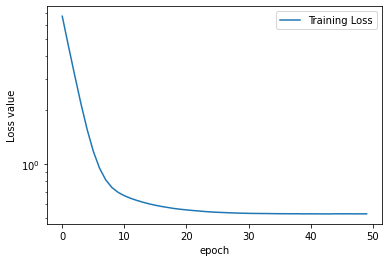

In [ ]:
import matplotlib.pyplot as plt

plt.semilogy(history.history["loss"], label="Training Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

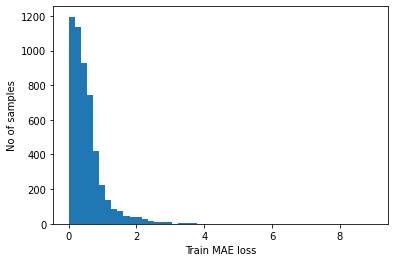

Reconstruction error threshold:  8.976696014404297


In [ ]:
y_pred = model.predict(X_test_scaled)
train_mae_loss = np.mean(np.abs(y_pred - y_test), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

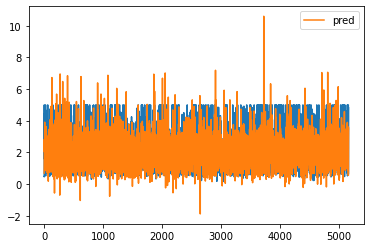

In [ ]:
# Checking how the first sequence is learnt
plt.plot(y_test)
plt.plot(y_pred, label = 'pred')
plt.legend()
plt.show()

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived